In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_665_SP_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_476_HF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_638_SP_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_121_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_175_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_843_BR_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_594_VF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_343.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_290_HF_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_838_BR_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_577_DA_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_369_RO_.jpg
/kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor/P_527_SP_.jpg
/kaggle/input/br

In [9]:
import os

# List contents of the input directory to verify paths
input_dir = '/kaggle/input'
for root, dirs, files in os.walk(input_dir):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")
    for dir in dirs:
        print(f"  Subdirectory: {dir}")


Directory: /kaggle/input
  Subdirectory: brain-tumors-dataset
Directory: /kaggle/input/brain-tumors-dataset
  Subdirectory: Data
Directory: /kaggle/input/brain-tumors-dataset/Data
  Subdirectory: Tumor
  Subdirectory: Normal
Directory: /kaggle/input/brain-tumors-dataset/Data/Tumor
  Subdirectory: pituitary_tumor
  Subdirectory: meningioma_tumor
  Subdirectory: glioma_tumor
Directory: /kaggle/input/brain-tumors-dataset/Data/Tumor/pituitary_tumor
  File: P_665_SP_.jpg
  File: P_476_HF_.jpg
  File: P_638_SP_.jpg
  File: P_121_DA_.jpg
  File: P_175_DA_.jpg
  File: P_843_BR_.jpg
  File: P_594_VF_.jpg
  File: P_343.jpg
  File: P_290_HF_.jpg
  File: P_838_BR_.jpg
  File: P_577_DA_.jpg
  File: P_369_RO_.jpg
  File: P_527_SP_.jpg
  File: P_44_DA_.jpg
  File: P_535_HF_.jpg
  File: P_490_VF_.jpg
  File: P_552_HF_.jpg
  File: P_309_DA_.jpg
  File: P_368_BR_.jpg
  File: P_140_VF_.jpg
  File: P_413_HF_.jpg
  File: P_467_SP_.jpg
  File: P_822_VF_.jpg
  File: P_97_SP_.jpg
  File: P_619_HF_.jpg
  File:

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_dir = '/kaggle/input/brain-tumors-dataset/Data'

# Define data augmentation and preprocessing for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print out the class indices to verify
print("Class indices:", train_generator.class_indices)


Found 17338 images belonging to 2 classes.
Found 4334 images belonging to 2 classes.
Class indices: {'Normal': 0, 'Tumor': 1}


Found 17338 images belonging to 2 classes.
Found 4334 images belonging to 2 classes.
Class indices: {'Normal': 0, 'Tumor': 1}
Number of classes: 2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-27 11:46:13.427806: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 85125: 2.9042, expected 2.51192
2024-07-27 11:46:13.427938: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 95036: 2.9042, expected 2.51192
2024-07-27 11:46:13.428085: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 111138: 6.94541, expected 6.03873
2024-07-27 11:46:13.428111: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 111140: 7.54481, expected 6.63813
2024-07-27 11:46:13.428128: E external/local_xla/xla/service/gpu/buffer_

   3/1084 ━━━━━━━━━━━━━━━━━━━━ 1:14 69ms/step - accuracy: 0.7847 - loss: 1.0299 

I0000 00:00:1722080778.461845     151 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722080778.483083     151 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 718/1084 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.8517 - loss: 0.4571

2024-07-27 11:47:39.464609: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48178: 5.38698, expected 4.73212
2024-07-27 11:47:39.464686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48303: 5.44146, expected 4.7866
2024-07-27 11:47:39.464703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48304: 5.17952, expected 4.52467
2024-07-27 11:47:39.464724: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48648: 5.44648, expected 4.79163
2024-07-27 11:47:39.464744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48867: 5.27575, expected 4.6209
2024-07-27 11:47:39.464755: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 48993: 5.02446, expected 4.36961
2024-07-27 11:47:39.464767: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49204: 5.36322, expected 4.70836
2024-07-27 11:47:39.464783: E

1077/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8547 - loss: 0.4345

W0000 00:00:1722080901.477251     151 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-07-27 11:48:36.343779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47632: 8.0798, expected 7.16152
2024-07-27 11:48:36.343833: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47634: 7.98812, expected 7.06985
2024-07-27 11:48:36.343843: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47670: 6.74034, expected 5.82207
2024-07-27 11:48:36.343851: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47671: 7.85629, expected 6.93801
2024-07-27 11:48:36.343859: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47680: 7.70231, expected 6.78404
2024-07-27 11:48:36.343867: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47681: 8.02623, expected 7.10796
2024-07-27 11:48:36.343875: E external/loc

1084/1084 ━━━━━━━━━━━━━━━━━━━━ 147s 128ms/step - accuracy: 0.8548 - loss: 0.4341 - val_accuracy: 0.8754 - val_loss: 0.3182
Epoch 2/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.8672 - loss: 0.3395 - val_accuracy: 0.8634 - val_loss: 0.4367
Epoch 3/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.8609 - loss: 0.3325 - val_accuracy: 0.8717 - val_loss: 0.2761
Epoch 4/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.8586 - loss: 0.3472 - val_accuracy: 0.8632 - val_loss: 0.2657
Epoch 5/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 95s 88ms/step - accuracy: 0.8578 - loss: 0.4014 - val_accuracy: 0.8576 - val_loss: 0.3788
Epoch 6/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - accuracy: 0.8547 - loss: 0.3937 - val_accuracy: 0.8581 - val_loss: 0.3031
Epoch 7/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.8611 - loss: 0.3391 - val_accuracy: 0.8604 - val_loss: 0.2475
Epoch 8/10
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 93s 86ms/step - accuracy: 0.8593 - loss: 0.

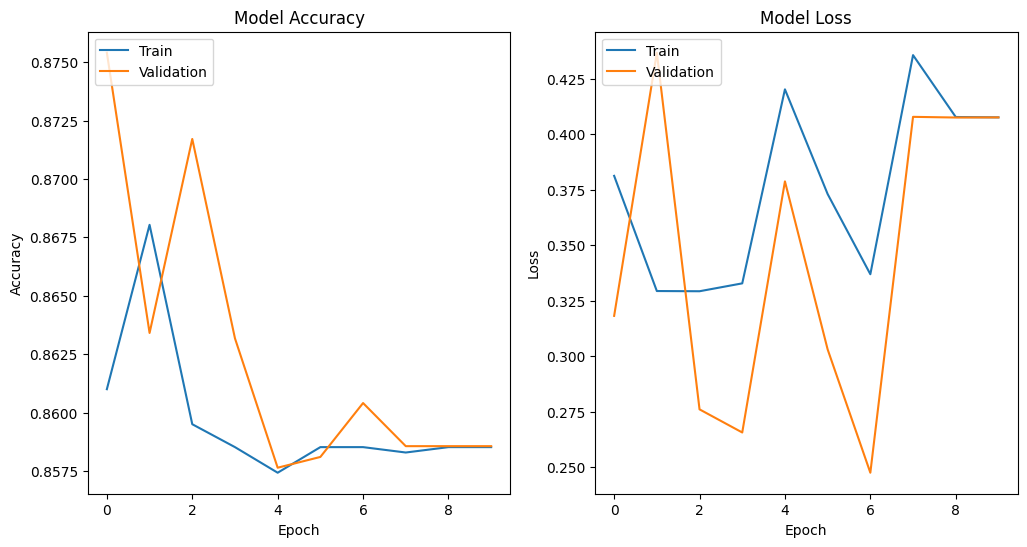

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_dir = '/kaggle/input/brain-tumors-dataset/Data'

# Define data augmentation and preprocessing for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Print out the class indices to verify
print("Class indices:", train_generator.class_indices)
print("Number of classes:", train_generator.num_classes)

# Number of classes (Normal, Pituitary, Meningioma, Glioma)
num_classes = train_generator.num_classes

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust this number as needed
    validation_data=val_generator
)

# Save the model
model.save('/kaggle/working/brain_tumor_model_with_subtypes.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

def predict_tumor_type(img_path):
    # Load the trained model
    model = tf.keras.models.load_model('/kaggle/working/brain_tumor_model_with_subtypes.h5')
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Use (128, 128) as used during training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of 1
    img_array /= 255.0  # Scale the image
    
    # Predict the class
    predictions = model.predict(img_array)
    class_indices = train_generator.class_indices
    class_labels = list(class_indices.keys())
    
    predicted_class = class_labels[np.argmax(predictions)]
    
    return predicted_class

# Example usage
img_path = '/kaggle/input/brain-tumors-dataset/Data/pituitary_tumor/P_1.jpg'
predicted_tumor_type = predict_tumor_type(img_path)
print(f'Tumor Type: {predicted_tumor_type}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Tumor Type: Tumor


In [24]:
import os

# List files in the /kaggle/working directory to find the model file
os.listdir('/kaggle/working')


['train_data',
 '.virtual_documents',
 'brain_tumor_model_with_subtypes.h5',
 'val_data']

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
# Assuming y_true and y_pred are the true and predicted labels for the validation set
# y_true = [...]
# y_pred = [...]

# plot_confusion_matrix(y_true, y_pred, list(class_labels.values()))
# print(classification_report(y_true, y_pred, target_names=list(class_labels.values())))


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model_path = '/kaggle/working/brain_tumor_model_with_subtypes.h5'
model = tf.keras.models.load_model(model_path)

# Define class indices
class_indices = {
    'Normal': 0,
    'pituitary_tumor': 1,
    'meningioma_tumor': 2,
    'glioma_tumor': 3
}
class_labels = {v: k for k, v in class_indices.items()}

# Define tumor advice
tumor_advice = {
    'pituitary_tumor': {
        'medications': 'Medications may include dopamine agonists or surgical intervention. Consult with a neuroendocrinologist.',
        'doctors': 'Endocrinologist, Neurosurgeon',
        'diets': 'Maintain a balanced diet, rich in fruits and vegetables, and low in processed foods.'
    },
    'meningioma_tumor': {
        'medications': 'Treatment options may include surgery or radiation therapy. Consult with an oncologist or neurosurgeon.',
        'doctors': 'Neurosurgeon, Oncologist',
        'diets': 'Focus on a nutritious diet with adequate hydration. Avoid high-sugar and high-fat foods.'
    },
    'glioma_tumor': {
        'medications': 'Chemotherapy and radiotherapy are common treatments. Consult with a neuro-oncologist.',
        'doctors': 'Neuro-oncologist, Radiation oncologist',
        'diets': 'Follow a high-protein diet with plenty of fruits and vegetables. Stay hydrated.'
    },
    'Normal': {
        'medications': 'No medications required.',
        'doctors': 'Regular check-ups with a general physician.',
        'diets': 'Maintain a healthy lifestyle with balanced nutrition.'
    }
}

def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Ensure target size matches training size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of 1
    img_array /= 255.0  # Scale the image
    
    # Predict the class
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    
    # Map the index to the class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class, predictions

# Example usage
img_path = '/kaggle/input/brain-tumors-dataset/Data/Tumor/glioma_tumor/G_10.jpg'  # Change to your image path
predicted_tumor_type, raw_predictions = predict_tumor_type(img_path)
print(f'Raw predictions: {raw_predictions}')
print(f'Predicted Tumor Type: {predicted_tumor_type}')

# Function to get advice
def get_advice(tumor_type):
    advice = tumor_advice.get(tumor_type, {
        'medications': 'No advice available.',
        'doctors': 'No advice available.',
        'diets': 'No advice available.'
    })
    return advice

# Zip the model file for download
model_file = '/kaggle/working/brain_tumor_model_with_subtypes.h5'
zip_file = '/kaggle/working/brain_tumor_model_with_subtypes.zip'

with zipfile.ZipFile(zip_file, 'w') as zipf:
    zipf.write(model_file, arcname='brain_tumor_model_with_subtypes.h5')

print(f'Model file zipped to {zip_file}')

# Ensure the zip file is available in the Kaggle output directory
!ls /kaggle/working

# Plotting confusion matrix and classification report 
# Uncomment the following lines if you have y_true and y_pred

# from sklearn.metrics import confusion_matrix, classification_report
# def plot_confusion_matrix(y_true, y_pred, class_labels):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.title('Confusion Matrix')
#     plt.show()

# y_true = [...]  # True labels for validation data
# y_pred = [...]  # Predictions for validation data

# plot_confusion_matrix(y_true, y_pred, list(class_labels.values()))
# print(classification_report(y_true, y_pred, target_names=list(class_labels.values())))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Raw predictions: [[0.14092231 0.8590777 ]]
Predicted Tumor Type: pituitary_tumor
Model file zipped to /kaggle/working/brain_tumor_model_with_subtypes.zip


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


brain_tumor_model_with_subtypes.h5  brain_tumor_model_with_subtypes.zip


In [26]:
import zipfile

# Path to your model file
model_file = '/kaggle/working/brain_tumor_model_with_subtypes.h5'
zip_file = '/kaggle/working/brain_tumor_model_with_subtypes.zip'

# Zip the model file
with zipfile.ZipFile(zip_file, 'w') as zipf:
    zipf.write(model_file, arcname='brain_tumor_model_with_subtypes.h5')

print(f'Model file zipped to {zip_file}')


Model file zipped to /kaggle/working/brain_tumor_model_with_subtypes.zip


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define parameters
image_size = (128, 128)  # Update this if your image size is different
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(image_size[0], image_size[1], 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save('/kaggle/working/brain_tumor_ann_model.h5')
print("ANN model saved as 'brain_tumor_ann_model.h5'")


Found 17338 images belonging to 2 classes.
Found 4334 images belonging to 2 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


542/542 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.8175 - loss: 0.7968 - val_accuracy: 0.8752 - val_loss: 0.3599
Epoch 2/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.8805 - loss: 0.3220 - val_accuracy: 0.8874 - val_loss: 0.3648
Epoch 3/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.9023 - loss: 0.2676 - val_accuracy: 0.8646 - val_loss: 0.3592
Epoch 4/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9128 - loss: 0.2393 - val_accuracy: 0.8246 - val_loss: 0.4310
Epoch 5/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.9286 - loss: 0.1832 - val_accuracy: 0.9052 - val_loss: 0.2784
Epoch 6/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 31s 57ms/step - accuracy: 0.9443 - loss: 0.1545 - val_accuracy: 0.9019 - val_loss: 0.2975
Epoch 7/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9464 - loss: 0.1469 - val_accuracy: 0.8823 - val_loss: 0.4137
Epoch 8/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.9511 - loss: 0.1378 - val_accurac

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define parameters
image_size = (128, 128)  # Adjust this if your images are of different size
batch_size = 32
epochs = 10

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',  # Path to your dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/brain-tumors-dataset/Data',  # Path to your dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the ANN model
model = Sequential([
    Flatten(input_shape=(image_size[0], image_size[1], 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for multiple classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the model
model.save('/kaggle/working/brain_tumor_ann_.h5')
print("ANN model saved as 'brain_tumor_ann_.h5'")


Found 17338 images belonging to 2 classes.
Found 4334 images belonging to 2 classes.
Epoch 1/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.8159 - loss: 0.8761 - val_accuracy: 0.8606 - val_loss: 0.3892
Epoch 2/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.8825 - loss: 0.3266 - val_accuracy: 0.8874 - val_loss: 0.3469
Epoch 3/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.8975 - loss: 0.2747 - val_accuracy: 0.8999 - val_loss: 0.2806
Epoch 4/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.9179 - loss: 0.2210 - val_accuracy: 0.8980 - val_loss: 0.3002
Epoch 5/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.9338 - loss: 0.1777 - val_accuracy: 0.8835 - val_loss: 0.3364
Epoch 6/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.9399 - loss: 0.1634 - val_accuracy: 0.9024 - val_loss: 0.2713
Epoch 7/10
542/542 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.9567 - loss: 0.1239 - val_accuracy: 0.9093 - val_loss: 0.3212
Epoch

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import zipfile

# Load the trained ANN model
model_path = '/kaggle/working/brain_tumor_ann_.h5'
model = tf.keras.models.load_model(model_path)

# Define class indices
class_indices = {
    'Normal': 0,
    'Glioma': 1,
    'Meningioma': 2,
    'Pituitary': 3
}
class_labels = {v: k for k, v in class_indices.items()}

# Define tumor advice
tumor_advice = {
    'Pituitary': {
        'medications': 'Medications may include dopamine agonists or surgical intervention. Consult with a neuroendocrinologist.',
        'doctors': 'Endocrinologist, Neurosurgeon',
        'diets': 'Maintain a balanced diet, rich in fruits and vegetables, and low in processed foods.'
    },
    'Meningioma': {
        'medications': 'Treatment options may include surgery or radiation therapy. Consult with an oncologist or neurosurgeon.',
        'doctors': 'Neurosurgeon, Oncologist',
        'diets': 'Focus on a nutritious diet with adequate hydration. Avoid high-sugar and high-fat foods.'
    },
    'Glioma': {
        'medications': 'Chemotherapy and radiotherapy are common treatments. Consult with a neuro-oncologist.',
        'doctors': 'Neuro-oncologist, Radiation oncologist',
        'diets': 'Follow a high-protein diet with plenty of fruits and vegetables. Stay hydrated.'
    },
    'Normal': {
        'medications': 'No medications required.',
        'doctors': 'Regular check-ups with a general physician.',
        'diets': 'Maintain a healthy lifestyle with balanced nutrition.'
    }
}

def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Ensure target size matches training size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of 1
    img_array /= 255.0  # Scale the image
    
    # Predict the class
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    
    # Map the index to the class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class, predictions

# Example usage
img_path = '/kaggle/input/brain-tumors-dataset/Data/Tumor/meningioma_tumor/M_1.jpg'  # Change to your image path
predicted_tumor_type, raw_predictions = predict_tumor_type(img_path)
print(f'Raw predictions: {raw_predictions}')
print(f'Predicted Tumor Type: {predicted_tumor_type}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Raw predictions: [[0.08479922 0.9152008 ]]
Predicted Tumor Type: Glioma


In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import zipfile

# Load the trained model
model_path = '/kaggle/working/brain_tumor_model_with_subtypes.h5'
model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = {
    1: 'Normal',
    0: 'Tumor'
}

# Define tumor advice
tumor_advice = {
    'Tumor': {
        'medications': 'Consult a specialist for appropriate treatment.',
        'doctors': 'Oncologist, Neurosurgeon',
        'diets': 'Maintain a healthy diet rich in fruits and vegetables.'
    },
    'Normal': {
        'medications': 'No medications required.',
        'doctors': 'Regular check-ups with a general physician.',
        'diets': 'Maintain a healthy lifestyle with balanced nutrition.'
    }
}

def predict_tumor_type(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Ensure target size matches training size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of 1
    img_array /= 255.0  # Scale the image
    
    # Predict the class
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_index = (predictions > 0.5).astype("int32")[0][0]
    
    # Map the index to the class label
    predicted_class = class_labels[predicted_class_index]
    
    return predicted_class, predictions

# Example usage
img_path = '/kaggle/input/brain-tumors-dataset/Data/giloma_tumor/G_100.jpg'  # Change to your image path
predicted_tumor_type, raw_predictions = predict_tumor_type(img_path)
print(f'Raw predictions: {raw_predictions}')
print(f'Predicted Tumor Type: {predicted_tumor_type}')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Raw predictions: [[0.14092231 0.8590777 ]]
Predicted Tumor Type: Tumor
